# DS340W - Final Code

### Ririn Park 




This python notebook contains code and documentation regarding my research for DS340W. 


#### Table of Contents

Data Cleaning and Preprocessing

Exploratory Data Analysis

Baseline Model

Improved Model

Novelties




## Data Cleaning and Preprocessing

### Data reading

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Loading csv dataset
df = pd.read_csv('pgatour_cleaned.csv', encoding="cp1252", index_col = 0)

#Preview data
df.head(10)

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,17703,7,1,2007,3441119,AUS
1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,15630,6,1,2007,3413185,AUS
2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,2400,4,0,2007,868303,GER
3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,1989,0,0,2007,461216,DEN
4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,1875,1,0,2007,513630,AUS
5,Anthony Kim,93,70.128,302.4,60.79,65.35,-0.121,0.794,0.673,6856,4,0,2007,1545195,USA
6,Arron Oberholser,69,69.807,285.5,61.70,62.25,0.362,0.821,1.183,8811,5,0,2007,1797458,USA
7,Bart Bryant,87,70.637,281.1,70.66,66.34,0.198,0.440,0.638,4555,2,0,2007,1167874,USA
8,Ben Curtis,80,71.582,277.1,67.37,60.56,-0.188,-0.561,-0.749,2955,2,0,2007,772321,USA
9,Bill Haas,93,70.653,302.7,62.93,65.98,-0.018,0.426,0.408,2461,3,0,2007,967443,USA


In [186]:
#Look into dimensions and number of observations
print(df.shape)

df.info

(2044, 15)


<bound method DataFrame.info of                    NAME  ROUNDS  SCORING  DRIVE_DISTANCE  FWY_%  GIR_%   SG_P  \
0        Aaron Baddeley      83   70.088           291.9  60.00  60.35  0.629   
1            Adam Scott      69   70.008           300.9  59.17  65.44  0.129   
2            Alex Cejka      80   70.437           288.9  68.08  69.44 -0.479   
3         Anders Hansen      55   70.856           280.7  66.95  62.85 -0.176   
4         Andrew Buckle      77   71.443           294.7  58.14  62.52  0.161   
...                 ...     ...      ...             ...    ...    ...    ...   
2039           Whee Kim      74   70.964           289.4  54.32  62.09  0.456   
2040     William McGirt      89   71.151           284.8  70.06  67.23 -0.018   
2041  Xander Schauffele      96   70.163           306.3  57.68  67.74  0.342   
2042          Zac Blair     105   71.007           272.7  69.70  64.70  0.035   
2043       Zach Johnson      81   70.393           286.8  66.54  64.16  0.415

In [187]:
#Create 300+ Drive distance and Winner Column
df['300+'] = df['DRIVE_DISTANCE'].apply(lambda x: 1 if x >= 300 else 0)
df['Winner'] = df['1ST'].apply(lambda x: 1 if int(x) >= 1 else 0)

In [188]:
#Remove observations from 2007 and 2008
df2 = df[~df['Year'].isin([2007, 2008])]
df2.head()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY,300+,Winner
389,Aaron Baddeley,66,71.153,287.8,56.48,59.57,0.604,-0.755,-0.151,431,2,0,2009,837065,AUS,0,0
390,Adam Scott,53,71.720,294.9,58.77,62.82,-0.881,0.220,-0.660,432,1,0,2009,783138,AUS,0,0
391,Alex Cejka,82,70.980,281.2,69.80,66.52,-0.322,0.555,0.233,416,3,0,2009,953664,GER,0,0
392,Andres Romero,58,71.462,298.5,51.62,64.91,-0.044,-0.247,-0.291,329,2,0,2009,789305,ARG,0,0
393,Anthony Kim,76,70.507,299.0,53.65,62.69,0.245,0.235,0.479,1420,3,0,2009,1972155,USA,0,0


## Exploratory Data Analysis

### Numeric Feature Distribution

Checking for normality in data

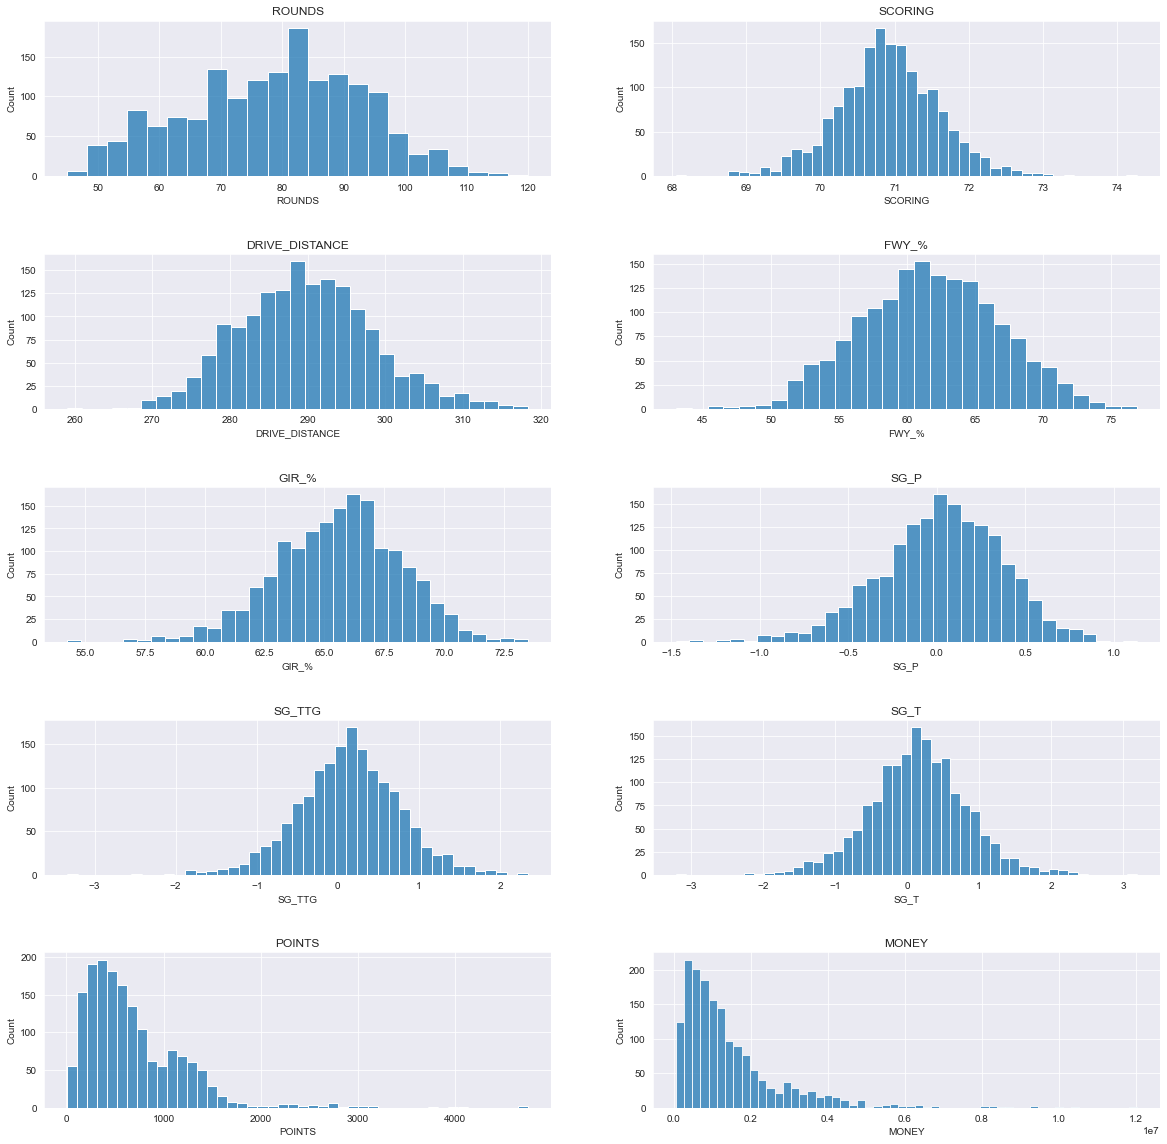

In [189]:
f, ax = plt.subplots(nrows = 5, ncols = 2, figsize=(20,20))
columns = ['ROUNDS','SCORING', 'DRIVE_DISTANCE', 'FWY_%', 'GIR_%', 'SG_P',
       'SG_TTG', 'SG_T', 'POINTS', 'MONEY']
row = 0
col = 0
for i, column in enumerate(columns):
    g = sns.histplot(df2[column], ax=ax[row][col])
    g.set(title =  column)
    col += 1
    if col == 2:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

### Data Class Balance

[Text(0, 0.5, '% Of Data'),
 Text(0.5, 1.0, 'Proportion of Winners vs Non-winners in dataset.')]

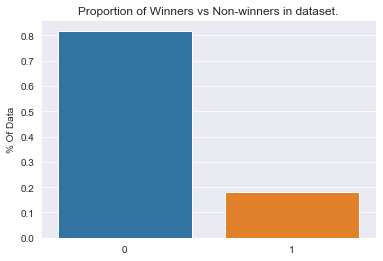

In [190]:
Class_Balance = sns.barplot(x=[0, 1], y=[(len(df2) - sum(df2['Winner'])) / len(df2), sum(df2['Winner']) / len(df2)])
Class_Balance.set(ylabel = "% Of Data", title="Proportion of Winners vs Non-winners in dataset.")

### Exploration of Winner Class

Swarmplot of Driving Distance by Year comparing winner and non-winner class

Text(0.5, 1.0, 'Driving Distance By Year and Winner')

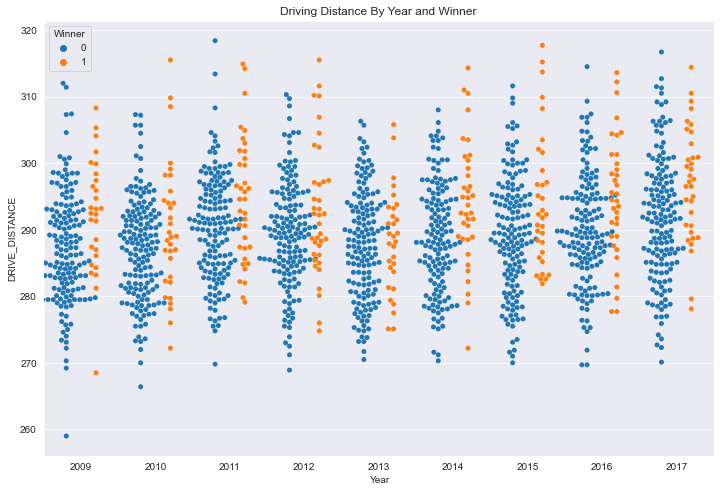

In [191]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Year', y='DRIVE_DISTANCE', hue='Winner', data=df2, dodge=True)
plt.title('Driving Distance By Year and Winner')

Boxplot of scoring average by Year among winners and non-winners

<AxesSubplot:xlabel='Year', ylabel='SCORING'>

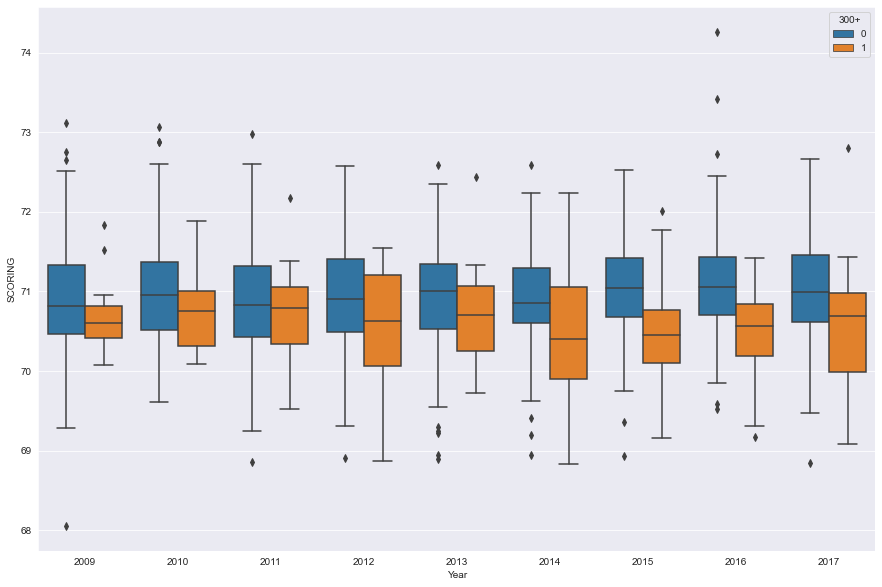

In [192]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Year', y = 'SCORING', hue='300+', data = df2)

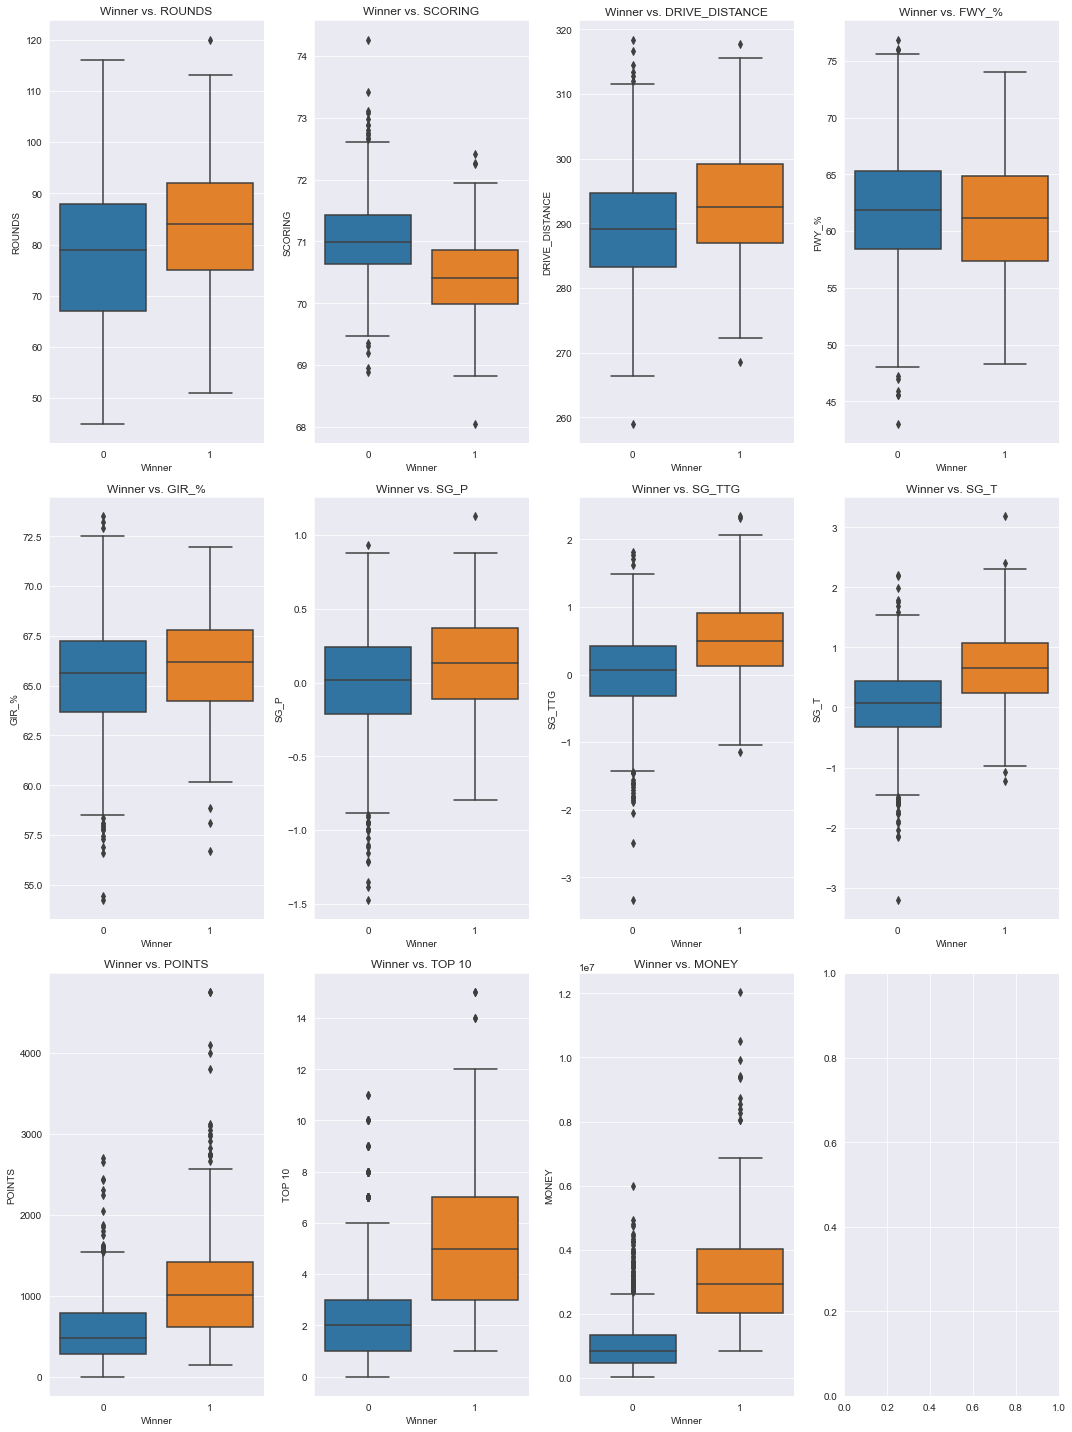

In [193]:
columns = ['ROUNDS', 'SCORING', 'DRIVE_DISTANCE', 'FWY_%', 'GIR_%', 'SG_P',
           'SG_TTG', 'SG_T', 'POINTS', 'TOP 10', 'MONEY']
n_rows = 3
n_cols = 4

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through columns and create plots
for ax, column in zip(axes, columns):
    sns.boxplot(x='Winner', y=column, data=df2, ax=ax)
    ax.set_title(f"Winner vs. {column}")

# Adjust spacing
plt.tight_layout()
plt.show()

### Exploration of Top 10 placings

[(68.0, 73.0),
 Text(0.5, 1.0, "# of top 10's vs scoring average"),
 Text(0, 0.5, 'Scoring Average')]

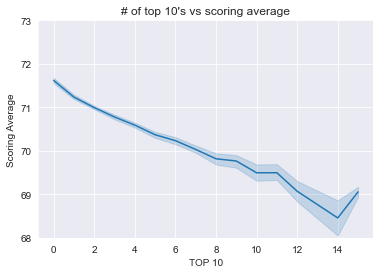

In [194]:
lp = sns.lineplot(x="TOP 10", y="SCORING", data=df2)
lp.set(ylim=(68, 73), title="# of top 10's vs scoring average", ylabel="Scoring Average")

[Text(0.5, 1.0, "# of top 10's vs Fedex Cup Points"),
 Text(0, 0.5, 'Fedex Cup Points')]

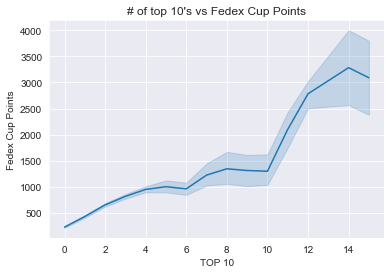

In [195]:
lp = sns.lineplot(x="TOP 10",y='POINTS', data = df2)
lp.set(title="# of top 10's vs Fedex Cup Points", ylabel="Fedex Cup Points")

### Correlation

<AxesSubplot:>

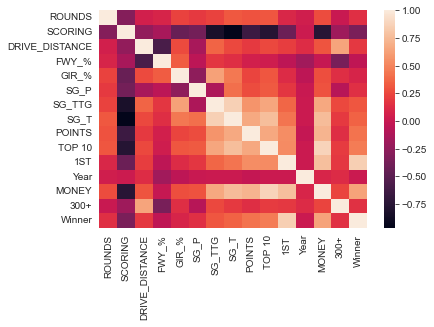

In [196]:
sns.heatmap(df2.corr())

### Feature Selection

In [197]:
#Assign name and target to variables
names = df2['NAME']
target = df2['Winner']
#Drop columns
df2.drop(['NAME', '1ST', 'Winner'], axis=1, inplace=True)

#Get dummies for country variable.
df2 = pd.get_dummies(df2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Domain Feature Creation

In [198]:
#copy of dataset to include domain features
domain_feats = df2.copy()

#Creating Money per round feature
domain_feats['MONEY_PER_ROUND'] = domain_feats['MONEY'] / domain_feats['ROUNDS']
#Create Strokes Gained sum feature
domain_feats['SG_SUM'] = domain_feats['SG_P'] + domain_feats['SG_TTG']

### Polynomial Feature Creation

In [199]:
# Copy the original DataFrame
poly_features = df2.copy()

# Import
from sklearn.preprocessing import PolynomialFeatures

# Create degree 2 poly features
poly_transformer = PolynomialFeatures(degree=2)

# Train the poly features
poly_transformer.fit(poly_features.iloc[:, :13])

# Transform
poly_features_array = poly_transformer.transform(poly_features.iloc[:, :13])

# Generate column for transformed features
poly_feature_names = poly_transformer.get_feature_names_out(input_features=poly_features.columns[:13])

# Convert back to a DataFrame with proper column names
import pandas as pd
poly_features = pd.DataFrame(poly_features_array, columns=poly_feature_names)

print('Polynomial Features Shape:', poly_features.shape)


Polynomial Features Shape: (1655, 105)


## Model Implementation

In [200]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [201]:
def random_forest_classifier(X, y, test_size=0.33, random_state=40, n_estimators=200):
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train Random Forest Classifier
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)

    # Plot feature importances
    plot_feature_importance(features=X.columns, importances=model.feature_importances_)

    # Generate predictions
    y_pred = model.predict(X_test)

    # Plot confusion matrix
    plot_confusion_matrix(y_true=y_test, y_pred=y_pred, classes=model.classes_)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and return ROC AUC score
    return calc_precision(y_true=y_test, y_pred=y_pred), calc_recall(y_true=y_test, y_pred=y_pred), calc_f1(y_true=y_test, y_pred=y_pred)

def calc_precision(y_true, y_pred):
    """Calculate and return Precision."""
    precision = precision_score(y_true, y_pred, average='binary')
    print(f"Precision: {precision:.4f}")
    return precision

def calc_recall(y_true, y_pred):
    """Calculate and return Recall."""
    recall = recall_score(y_true, y_pred, average='binary')
    print(f"Recall: {recall:.4f}")
    return recall

def calc_f1(y_true, y_pred):
    """Calculate and return F1-Score."""
    f1 = f1_score(y_true, y_pred, average='binary')
    print(f"F1-Score: {f1:.4f}")
    return f1


def plot_feature_importance(features, importances, top_n=10):
    """Plot the top N feature importances."""
    feature_importance = pd.DataFrame({"Features": features, "Importance": importances})
    feature_importance.sort_values(by="Importance", ascending=False, inplace=True)
    
    plt.figure(figsize=(16, 8))
    sns.barplot(x=feature_importance['Features'][:top_n], y=feature_importance['Importance'][:top_n])
    plt.title("Top Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.xticks(rotation=45)
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    """Plot the confusion matrix."""
    cf_matrix = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()





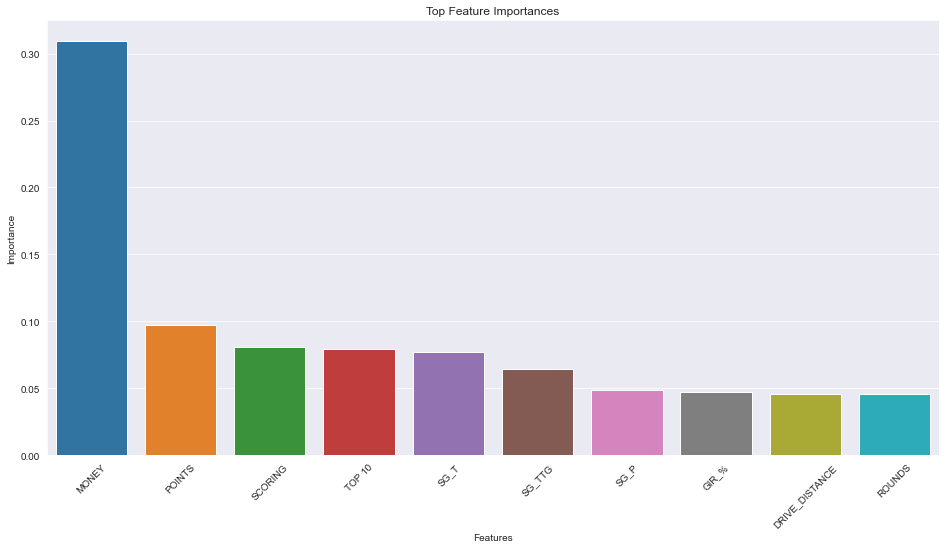

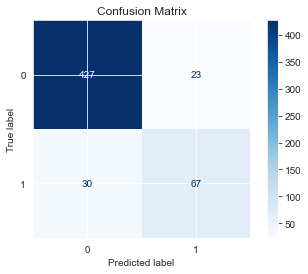

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       450
           1       0.74      0.69      0.72        97

    accuracy                           0.90       547
   macro avg       0.84      0.82      0.83       547
weighted avg       0.90      0.90      0.90       547

Precision: 0.7444
Recall: 0.6907
F1-Score: 0.7166


In [202]:
base_model = random_forest_classifier(df2, target)

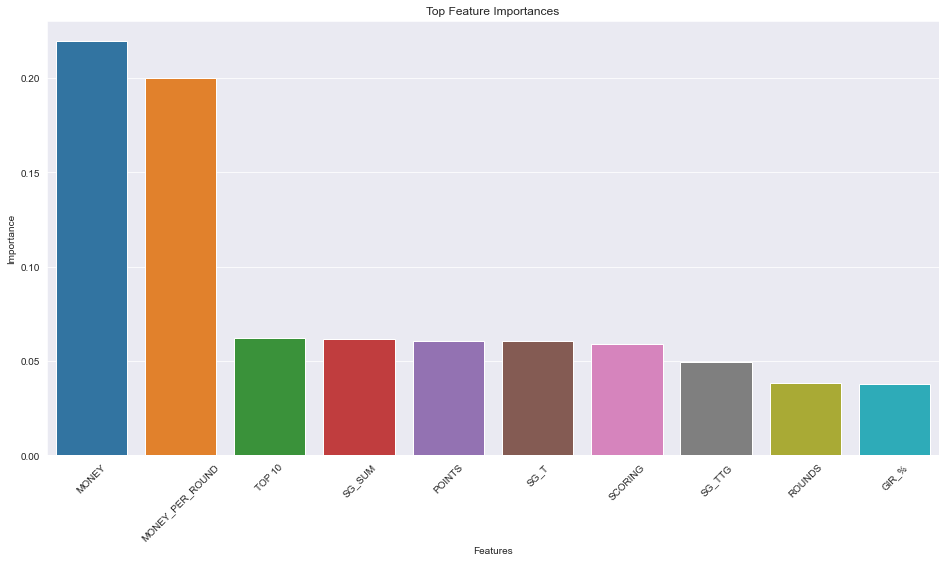

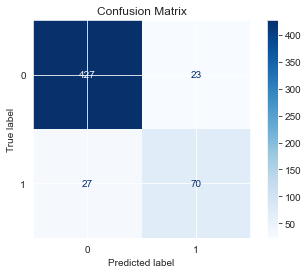

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       450
           1       0.75      0.72      0.74        97

    accuracy                           0.91       547
   macro avg       0.85      0.84      0.84       547
weighted avg       0.91      0.91      0.91       547

Precision: 0.7527
Recall: 0.7216
F1-Score: 0.7368


In [203]:
domain_model = random_forest_classifier(domain_feats, target)

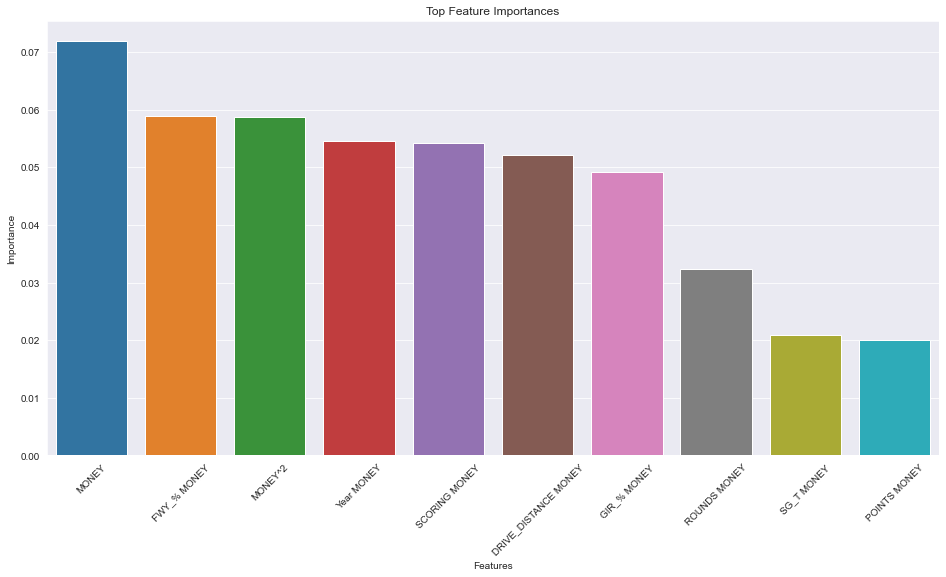

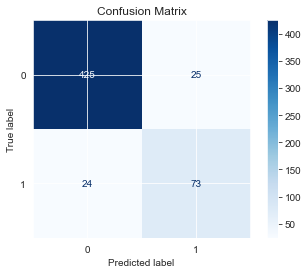

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       450
           1       0.74      0.75      0.75        97

    accuracy                           0.91       547
   macro avg       0.85      0.85      0.85       547
weighted avg       0.91      0.91      0.91       547

Precision: 0.7449
Recall: 0.7526
F1-Score: 0.7487


In [204]:
poly_model = random_forest_classifier(poly_features, target)

### Model Performance Results

In [205]:
results = pd.DataFrame([base_model, domain_model, poly_model], index=['Baseline Model', 'Domain Feature Model', 'Polynomial Feature Model'], columns = ['Precision','Recall','F1'])
results

,Precision,Recall,F1
Baseline Model,0.744444,0.690722,0.716578
Domain Feature Model,0.752688,0.721649,0.736842
Polynomial Feature Model,0.744898,0.752577,0.748718


## Novelty 



Imports

In [206]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

New performance metric to better determine strenght ROC AUC

In [207]:
def calc_roc_auc(y_true, y_pred):
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    return roc_auc


## NOT NOVELTY(attached to use calc_roc_auc) in Simplified RF function.

In [208]:

def random_forest_classifier(X, y, test_size=0.33, random_state=40, n_estimators=200):
    """simplified version of RF function from above to use ROC AUC function"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate and return ROC AUC score
    return calc_precision(y_true=y_test, y_pred=y_pred), calc_recall(y_true=y_test, y_pred=y_pred), calc_f1(y_true=y_test, y_pred=y_pred), calc_roc_auc(y_true=y_test, y_pred=y_pred)

In [209]:
base_rf = random_forest_classifier(df2, target)
domain_rf = random_forest_classifier(domain_feats, target)
poly_rf = random_forest_classifier(poly_features, target)

Precision: 0.7444
Recall: 0.6907
F1-Score: 0.7166
ROC AUC Score: 0.8198
Precision: 0.7527
Recall: 0.7216
F1-Score: 0.7368
ROC AUC Score: 0.8353
Precision: 0.7449
Recall: 0.7526
F1-Score: 0.7487
ROC AUC Score: 0.8485


## Novelty Cont.

Gradient Boosting classifier model implemented

In [210]:
def gradient_boosting_classifier(X, y, test_size=0.33, random_state=40, n_estimators=200, learning_rate=0.1, max_depth=3):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train Gradient Boosting Classifier
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=random_state)
    model.fit(X_train, y_train)

    # Plot feature importances
    plot_feature_importance(features=X.columns, importances=model.feature_importances_)

    # Generate predictions
    y_pred = model.predict(X_test)

    # Plot confusion matrix
    plot_confusion_matrix(y_true=y_test, y_pred=y_pred, classes=model.classes_)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate and return ROC AUC score
    return calc_precision(y_true=y_test, y_pred=y_pred), calc_recall(y_true=y_test, y_pred=y_pred), calc_f1(y_true=y_test, y_pred=y_pred), calc_roc_auc(y_true=y_test, y_pred=y_pred)

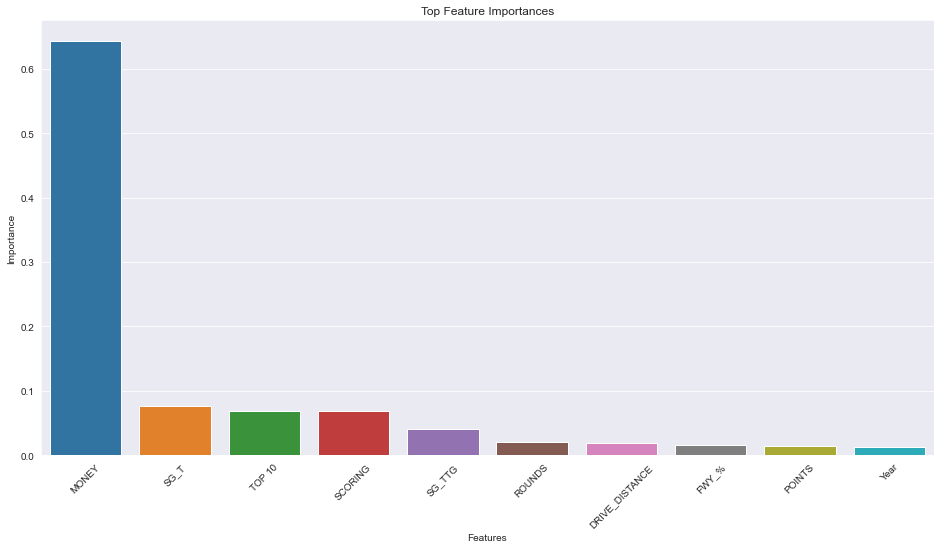

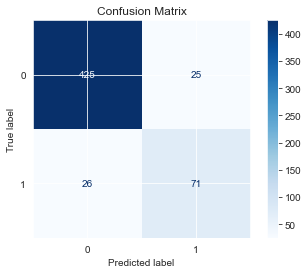

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       450
           1       0.74      0.73      0.74        97

    accuracy                           0.91       547
   macro avg       0.84      0.84      0.84       547
weighted avg       0.91      0.91      0.91       547

Precision: 0.7396
Recall: 0.7320
F1-Score: 0.7358
ROC AUC Score: 0.8382


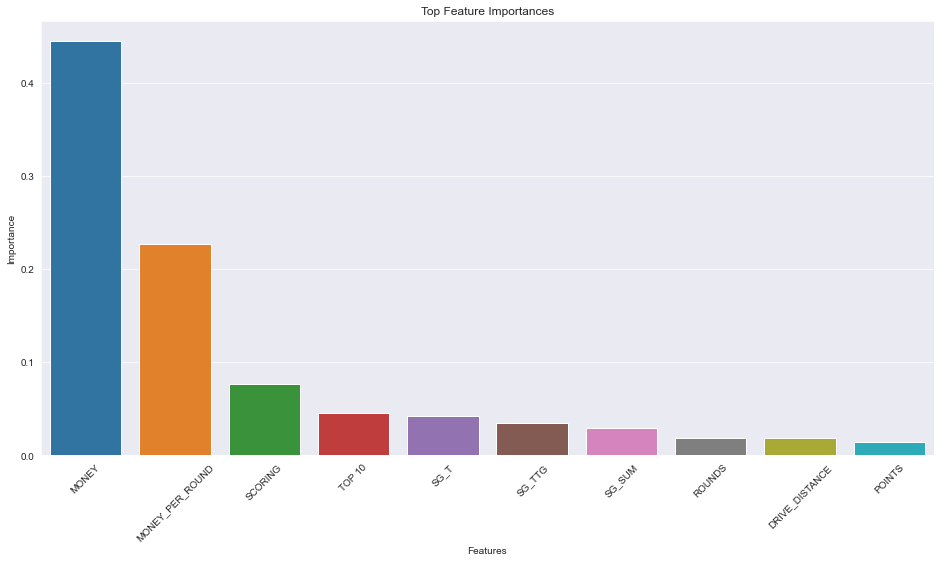

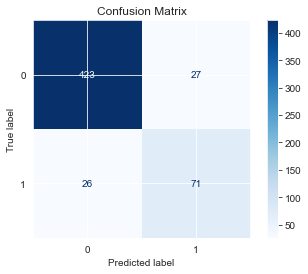

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       450
           1       0.72      0.73      0.73        97

    accuracy                           0.90       547
   macro avg       0.83      0.84      0.83       547
weighted avg       0.90      0.90      0.90       547

Precision: 0.7245
Recall: 0.7320
F1-Score: 0.7282
ROC AUC Score: 0.8360


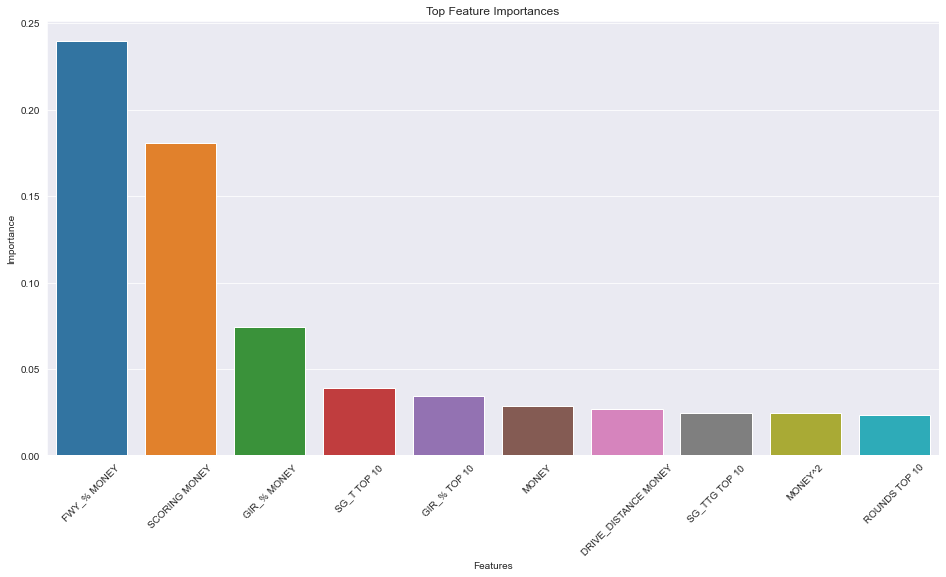

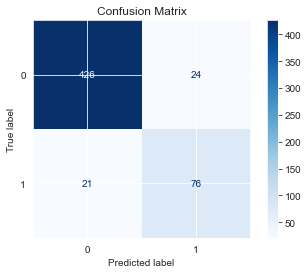

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       450
           1       0.76      0.78      0.77        97

    accuracy                           0.92       547
   macro avg       0.86      0.87      0.86       547
weighted avg       0.92      0.92      0.92       547

Precision: 0.7600
Recall: 0.7835
F1-Score: 0.7716
ROC AUC Score: 0.8651


In [211]:
base_gb = gradient_boosting_classifier(df2, target)
domain_gb = gradient_boosting_classifier(domain_feats, target)
poly_gb = gradient_boosting_classifier(poly_features, target)

In [212]:
#Combining all result metrics
results = pd.DataFrame([base_rf, domain_rf, poly_rf, base_gb, domain_gb, poly_gb], index=['Baseline Model', 'Domain Feature Model', 'Polynomial Feature Model','GradBoost Base', 'GradBoost DomFeat','GradBoost Poly'], columns = ['Precision','Recall','F1','ROC AUC Score'])
results

,Precision,Recall,F1,ROC AUC Score
Baseline Model,0.744444,0.690722,0.716578,0.819805
Domain Feature Model,0.752688,0.721649,0.736842,0.835269
Polynomial Feature Model,0.744898,0.752577,0.748718,0.848511
GradBoost Base,0.739583,0.731959,0.735751,0.838202
GradBoost DomFeat,0.724490,0.731959,0.728205,0.835979
GradBoost Poly,0.760000,0.783505,0.771574,0.865086
